### For this project I will be building a convolutional neural network to try and determine whether a mole is malignant or benign. The dataset can be found on kaggle at https://www.kaggle.com/fanconic/skin-cancer-malignant-vs-benign

### Because I don't have a gpu I will be working on google colab. First step is to unzip the files. I put the file on my google drive for easy access. 

In [1]:
from zipfile import ZipFile
filename = '/content/drive/My Drive/skin-cancer-malignant-vs-benign.zip'

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print('Done')


Done


In [0]:
from sklearn.preprocessing import StandardScaler

import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns

from PIL import Image

In [0]:
folder_benign_train = 'data/train/benign'
folder_malignant_train = 'data/train/malignant'

folder_benign_test = 'data/test/benign'
folder_malignant_test = 'data/test/malignant'

In [0]:
# read in jpegs as arrays
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

In [0]:
# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')

ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')

ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

In [0]:
# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

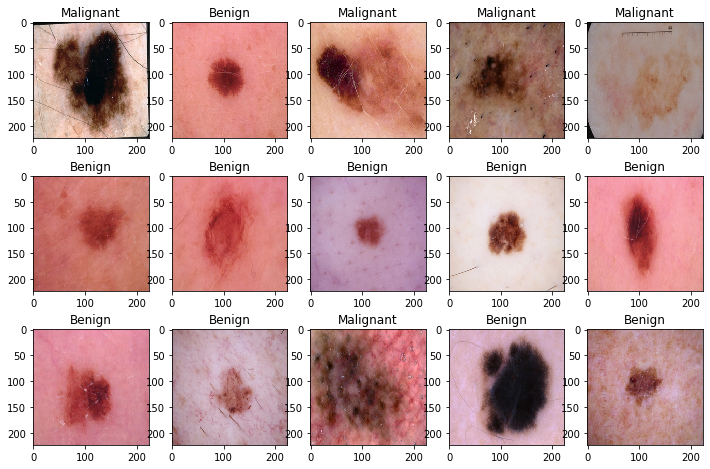

In [7]:
# Display first 15 images of moles, and how they are classified
w=50
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [8]:
print(X_train.shape, X_test.shape)

(2637, 224, 224, 3) (660, 224, 224, 3)


In [9]:
# Import various componenets for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop
from keras.utils import to_categorical

# Import the backend
from keras import backend as K

# Convert to float32 for type consistency
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize values to 1 from 0 to 255 (256 values of pixels)
X_train = X_train / 255
X_test = X_test / 255

# Print sample sizes
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
# So instead of one column with 2 values, create 2 binary columns
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

Using TensorFlow backend.


2637 train samples
660 test samples


In [0]:
# Part 1 - Building the CNN
# I'll start off extremely simple

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
history = classifier.fit(X_train, y_train,
                     batch_size=128,
                     epochs=25,
                     verbose=1,
                     validation_data=(X_test, y_test))
score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 2637 samples, validate on 660 samples
Epoch 1/25
2637/2637 [==============================] - 6s 2ms/step - loss: 7.6181 - acc: 0.4983 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 2/25
2637/2637 [==============================] - 5s 2ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 3/25
2637/2637 [==============================] - 5s 2ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 4/25
2637/2637 [==============================] - 5s 2ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 5/25
2637/2637 [==============================] - 5s 2ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 6/25
2637/2637 [==============================] - 5s 2ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 7/25
2637/2637 [==============================] - 5s 2ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 8/25
2637

### So it seems there's a pretty obvious lack of information to create an accurate model. I will use Keras's ImageDataGenerator to add information to the model. 

In [16]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history = classifier.fit_generator(training_set,
                         steps_per_epoch = 2637,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 660)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/5
2637/2637 [==============================] - 267s 101ms/step - loss: 0.3387 - acc: 0.8357 - val_loss: 0.3887 - val_acc: 0.8211
Epoch 2/5
2637/2637 [==============================] - 265s 101ms/step - loss: 0.2306 - acc: 0.8961 - val_loss: 0.3775 - val_acc: 0.8334
Epoch 3/5
2637/2637 [==============================] - 264s 100ms/step - loss: 0.1473 - acc: 0.9381 - val_loss: 0.5261 - val_acc: 0.8407
Epoch 4/5
2637/2637 [==============================] - 261s 99ms/step - loss: 0.0876 - acc: 0.9672 - val_loss: 0.5788 - val_acc: 0.8531
Epoch 5/5
2637/2637 [==============================] - 259s 98ms/step - loss: 0.0515 - acc: 0.9821 - val_loss: 0.7834 - val_acc: 0.8487


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


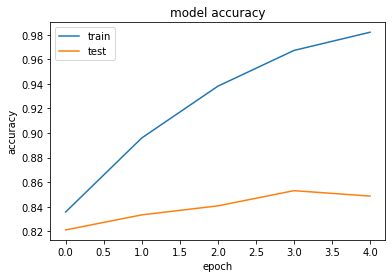

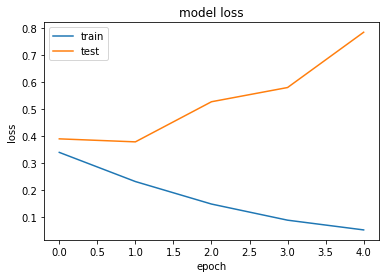

In [17]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Because I am working with a relatively small set, I am overfitting pretty quickly. I will run the same code with a second convolutional layer added in. Maybe It will help reduce some of the overfitting in the last run. 

In [18]:
# Building another CNN with a 2nd convolutional layer

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add Dropout
classifier.add(Dropout(0.2))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add Dropout
classifier.add(Dropout(0.2))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history = classifier.fit_generator(training_set,
                         steps_per_epoch = 2637,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 660)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/5
2637/2637 [==============================] - 263s 100ms/step - loss: 0.3518 - acc: 0.8260 - val_loss: 0.3218 - val_acc: 0.8439
Epoch 2/5
2637/2637 [==============================] - 264s 100ms/step - loss: 0.2189 - acc: 0.9019 - val_loss: 0.3841 - val_acc: 0.8530
Epoch 3/5
2637/2637 [==============================] - 262s 99ms/step - loss: 0.1274 - acc: 0.9489 - val_loss: 0.4252 - val_acc: 0.8517
Epoch 4/5
2637/2637 [==============================] - 268s 102ms/step - loss: 0.0831 - acc: 0.9682 - val_loss: 0.6273 - val_acc: 0.8439
Epoch 5/5
2637/2637 [==============================] - 270s 103ms/step - loss: 0.0610 - acc: 0.9783 - val_loss: 0.6249 - val_acc: 0.8563


ValueError: ignored

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


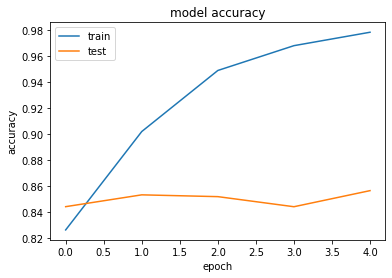

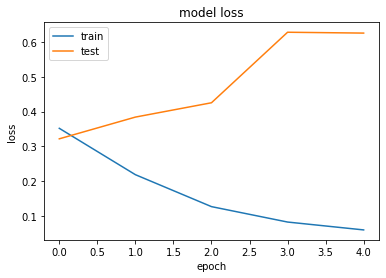

In [19]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### This did marginally better, but there are still some obvious overfitting problems. After doing some research, I found that resnet50 will probably yield some pretty good results. I will be using the fastai package to do this.

In [0]:
from fastai.vision import *

import torchvision

In [3]:
path = 'data'
classes = ['malignant','benign']
ImageList.from_folder(path)

ImageList (3297 items)
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
Path: data

In [0]:
tfms = get_transforms(do_flip=True, flip_vert=True)

data = (ImageList.from_folder(path)
        .split_by_folder('train', 'test')          
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch(bs=64)
        .normalize(imagenet_stats))

In [5]:
data


ImageDataBunch;

Train: LabelList (2637 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
benign,benign,benign,benign,benign
Path: data;

Valid: LabelList (660 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
benign,benign,benign,benign,benign
Path: data;

Test: None

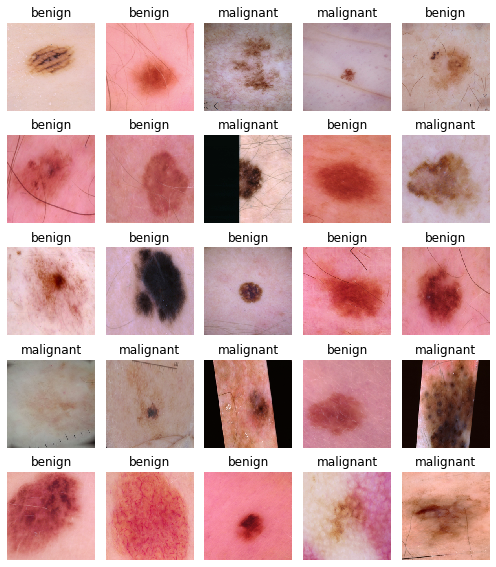

In [6]:
data.show_batch(rows=5, figsize=(7,8))

### So I'm still having issues with overfitting and underperforming models. I'm going to try using a pretrained resnet50 model to see if I can't up the performance. I'll be using the torchvision and fastai modules to help. 

In [0]:
learn = cnn_learner(data, 
                    models.resnet50, 
                    metrics=[error_rate, accuracy], 
                    model_dir = Path('data'),
                    path = Path("."), 
                    pretrained=True)

In [9]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
___________________________________________________

In [10]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.816966,0.546962,0.157576,0.842424,00:31
1,0.686894,0.497541,0.165152,0.834848,00:28
2,0.595586,0.430348,0.148485,0.851515,00:28
3,0.482713,0.348643,0.133333,0.866667,00:28
4,0.416300,0.341508,0.154545,0.845455,00:28
5,0.370391,0.313655,0.143939,0.856061,00:28
6,0.324486,0.310983,0.131818,0.868182,00:28
7,0.297990,0.291998,0.131818,0.868182,00:28
8,0.282636,0.273360,0.130303,0.869697,00:28
9,0.266123,0.268319,0.122727,0.877273,00:28


In [16]:
learn.lr_find(start_lr=1e-9, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-09
Min loss divided by 10: 1.00E-06


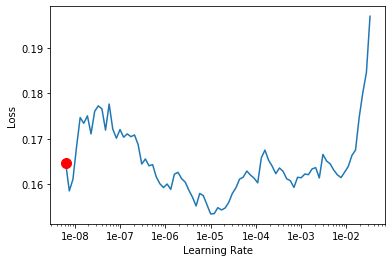

In [17]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.save('first')


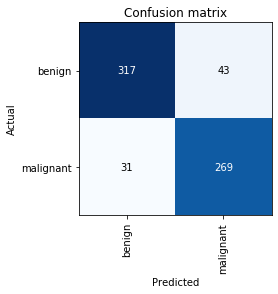

In [19]:
learn.load('first');interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

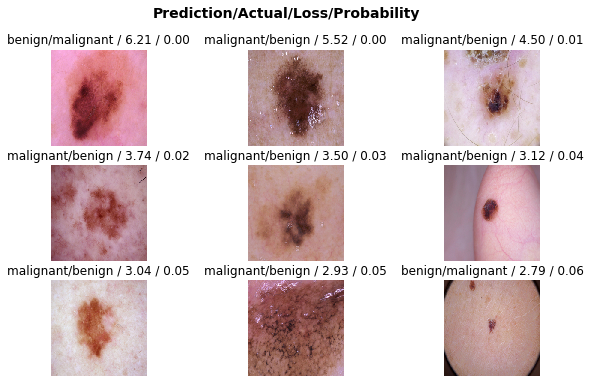

In [25]:
interp.plot_top_losses(9, figsize=(10,6))

### I am much happier with these results. The accuracy is much better and the training and validation loss are both improving through each epoch. 

In [0]:
learn.load('first')
learn.unfreeze()

In [27]:
learn.fit_one_cycle(15, max_lr=slice(1e-04,1e-06)) 

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.166636,0.235343,0.121212,0.878788,00:37
1,0.161675,0.233117,0.110606,0.889394,00:36
2,0.161631,0.231588,0.109091,0.890909,00:36
3,0.160311,0.224685,0.096970,0.903030,00:36
4,0.153416,0.240462,0.106061,0.893939,00:36
5,0.144044,0.224544,0.093939,0.906061,00:36
6,0.138340,0.227732,0.098485,0.901515,00:36
7,0.138417,0.226580,0.101515,0.898485,00:36
8,0.129747,0.232975,0.081818,0.918182,00:36
9,0.128326,0.229024,0.086364,0.913636,00:36


In [0]:
learn.save('second')

In [29]:
learn.load('second');interp = ClassificationInterpretation.from_learner(learn)

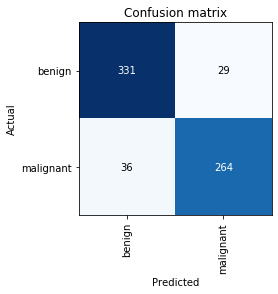

In [30]:
interp.plot_confusion_matrix()

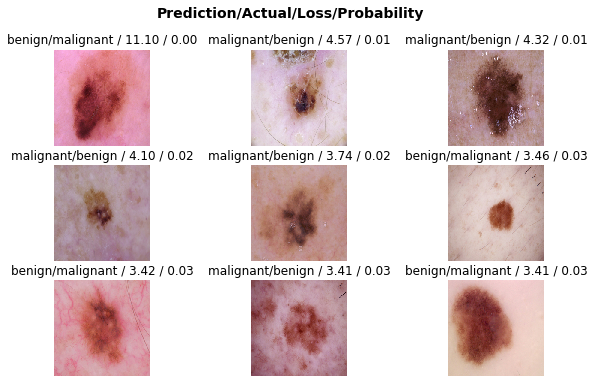

In [31]:
interp.plot_top_losses(9, figsize=(10,6))

### It's interesting how often a malignant mole is confused as benign. I think this goes to show that imaging might be a useful tool to determine the likelihood of having skin cancer, it is by no means a substitute for medical professionals. 

### I am extemely happy with 90-91% efficacy. I think this is a complex problem to approach. I would love to see more photos added to this dataset. With just under 3k photos in total, I feel that this dataset is a little thin. 